**Q1. Write a python program to implement a knowledge representation scheme use cases in google collab and submit the .ipynb file in GCR.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Algorithm:-**

**Knowledge representation and reasoning (KR, KRR) is the part of Artificial intelligence** which concerned with AI agents thinking and how thinking contributes to intelligent behavior of agents.

 ->It is responsible for representing information about the real world so that a computer can understand and can utilize this knowledge to solve the complex real world problems such as diagnosis a medical condition or communicating with humans in natural language.

->It is also a way which describes how we can represent knowledge in artificial intelligence. Knowledge representation is not just storing data into some database, but it also enables an intelligent machine to learn from that knowledge and experiences so that it can behave intelligently like a human.
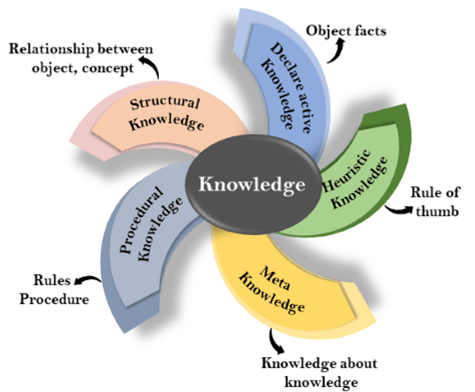

In [ ]:
import sys

def definiteNoun(s):
  s = s.lower().strip()
  if s in ['a', 'e', 'i', 'o', 'u', 'y']:
    return "an " + s
  else:
    return "a " + s

def removeArticle(s):
  "Remove the definite article 'a' or 'an' from a noun."
  s = s.lower().strip()
  if s[0:3] == "an ": return s[3:]
  if s[0:2] == "a ": return s[2:]
  return s

def makeQuestion(question, yes, no):
  return [question, yes, no]

def isQuestion(p):
  "Check if node is a question (with answers), or a plain answer."
  return type(p).__name__ == "list"

def askQuestion(question):
  print ("\r%s " % question,)
  return sys.stdin.readline().strip().lower()

def getAnswer(question):
  if isQuestion(question):
    return askQuestion(question[0])
  else:
    return askQuestion("Were you thinking about %s?" % definiteNoun(question))

def answeredYes(answer):
  if len(answer) > 0:
    return answer.lower()[0] == "y"
  return False

def gameOver(message):
  global tries
  print ("")
  print ("\r%s" % message)
  print ("")

def playAgain():
  return answeredYes(askQuestion("Do you want to play again?"))

def correctGuess(message):
  global tries
  gameOver(message)

  if playAgain():
    print ("")
    tries = 0
    return Q
  else:
    sys.exit(0)

def nextQuestion(question, answer):
  global tries
  tries += 1

  if isQuestion(question):
    if answer:
      return question[1]
    else:
      return question[2]
  else:
    if answer:
      return correctGuess("I knew it!")
    else:
      return makeNewQuestion(question)

def replaceAnswer(tree, find, replace):
  if not isQuestion(tree):
    if tree == find:
      return replace
    else:
      return tree
  else:
    return makeQuestion(tree[0],
      replaceAnswer(tree[1], find, replace),
      replaceAnswer(tree[2], find, replace))

def makeNewQuestion(wrongAnimal):
  global Q, tries

  correctAnimal = removeArticle(askQuestion("I give up.  What did you think about?"))

  newQuestion = askQuestion("Enter a question that would distinguish %s from %s:"
      % (definiteNoun(correctAnimal), definiteNoun(wrongAnimal))).capitalize()

  yesAnswer = answeredYes(askQuestion("If I asked you this question " +
    "and you thought about %s, what would the correct answer be?" % definiteNoun(correctAnimal)))

  # Create new question node
  if yesAnswer:
    q = makeQuestion(newQuestion, correctAnimal, wrongAnimal)
  else:
    q = makeQuestion(newQuestion, wrongAnimal, correctAnimal)
  Q = replaceAnswer(Q, wrongAnimal, q)
  tries = 0
  return Q

def addNewQuestion(wrongAnimal, newques, correct):
    global Q
    q = makeQuestion(newques, correct, wrongAnimal)
    Q = replaceAnswer(Q, wrongAnimal, q)
    return Q

tries = 0
Q = (makeQuestion('Does it have fur?', 'Tiger', 'Penguin'))
q = addNewQuestion('Tiger', 'Does it have dark spots?', 'Leopard')
q = addNewQuestion('Leopard', 'Is it the fastest animal?', 'Cheetah')
q = addNewQuestion('Penguin', 'Can it fly?', 'Parrot')
q = Q

print ("Imagine an animal.  I will try to guess which one.")
print ("You are only allowed to answer YES or NO.")
print ("")

try:
  while True:
    ans = answeredYes(getAnswer(q))
    q = nextQuestion(q, ans)
except KeyboardInterrupt:
  sys.exit(0)
except Exception:
  sys.exit(1)

Imagine an animal.  I will try to guess which one.
You are only allowed to answer YES or NO.

Does it have fur? 
Can it fly? 
Were you thinking about a penguin? 
I give up.  What did you think about? 
Enter a question that would distinguish a  from a penguin: 
If I asked you this question and you thought about a , what would the correct answer be? 
Does it have fur? 
Can it fly? 
 
Were you thinking about a ? 
I give up.  What did you think about? 
Enter a question that would distinguish a  from a : 
If I asked you this question and you thought about a , what would the correct answer be? 
Does it have fur? 
Can it fly? 
 
 
Were you thinking about a ? 
I give up.  What did you think about? 
Enter a question that would distinguish a  from a : 
If I asked you this question and you thought about a , what would the correct answer be? 
Does it have fur? 
Can it fly? 
 
 
 
Were you thinking about a ? 
I give up.  What did you think about? 
Enter a question that would distinguish a  from a :

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
